<a href="https://colab.research.google.com/github/Arathtr/Proyectos/blob/main/Calopeia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("simu2.xlsx")

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1000x600 with 0 Axes>

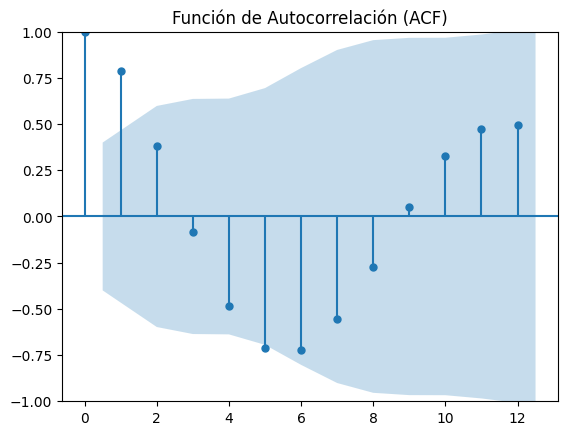

In [ ]:
# Crear gráfico ACF
plt.figure(figsize=(10, 6))
plot_acf(df["Calopeia"], lags=12)
plt.title('Función de Autocorrelación (ACF)')
plt.show()

<Figure size 1000x600 with 0 Axes>

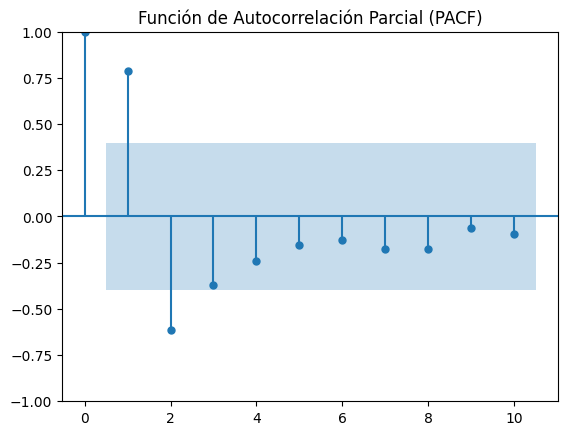

In [ ]:
# Crear gráfico PACF
plt.figure(figsize=(10, 6))
plot_pacf(df["Calopeia"], lags=10)
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.show()

In [ ]:
# p = 1
# d = 0
# q = 1

# P = 0 o 1
# D = 1
#Q = 0

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df.set_index("Mes",inplace = True)

In [ ]:
train = df.iloc[:19]
test = df.iloc[19:]

In [ ]:
total_len = len(df)

In [ ]:
start = len(train)
end = total_len - 1

In [ ]:
test

,Calopeia
Mes,
20,1909
21,1497
22,900
23,553
24,325


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.0 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
auto_arima(df, seasonal= True, m=6)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 0, 1, 6),
      suppress_warnings=True)

In [ ]:
modelo_arima = SARIMAX(df["Calopeia"],order = (2,0,1),seasonal_order = (0,1,0,6))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
results2 = modelo_arima.fit()

In [ ]:
predict2 = results2.predict(start=start, end=end, dynamic=False)

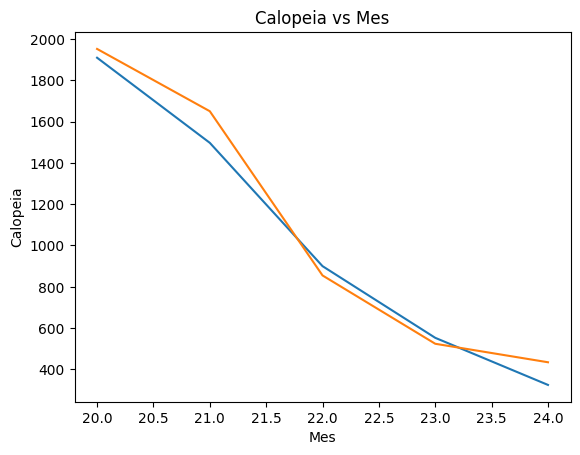

In [ ]:
plt.plot(test.index, test["Calopeia"])
plt.plot(test.index,predict2)
plt.xlabel("Mes")
plt.ylabel("Calopeia")
plt.title("Calopeia vs Mes")

plt.show()

In [ ]:
train["Calopeia"]

,Calopeia
Mes,
1,338
2,469
3,1017
4,1370
5,1902
6,2128
7,2255
8,1872
9,1553


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


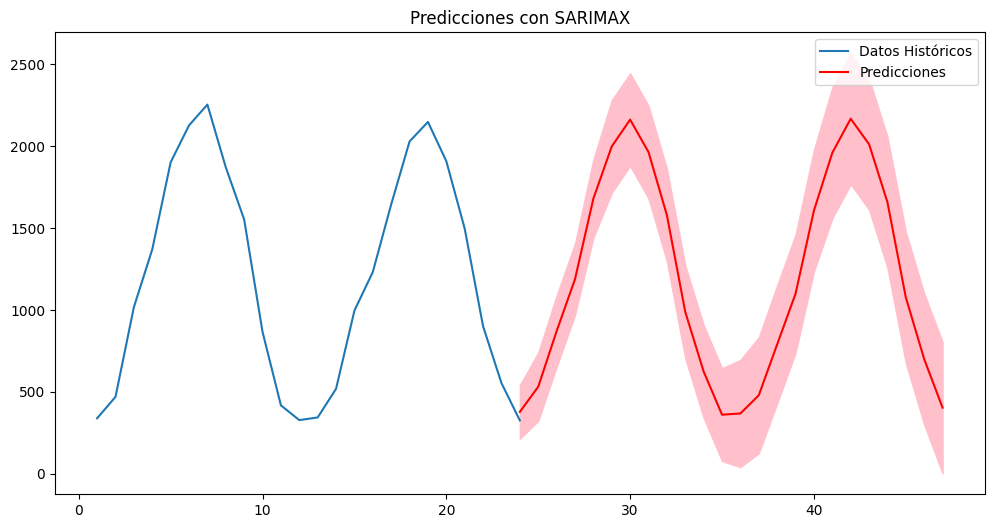

In [ ]:
predictions = results2.get_forecast(steps=24)
predicted_mean = predictions.predicted_mean
predicted_ci = predictions.conf_int()

#Prediccion
plt.figure(figsize=(12, 6))
plt.plot(df, label='Datos Históricos')
plt.plot(predicted_mean, label='Predicciones', color='red')
plt.fill_between(predicted_ci.index, predicted_ci.iloc[:, 0], predicted_ci.iloc[:, 1], color='pink')
plt.title('Predicciones con SARIMAX')
plt.legend()
plt.show()

In [ ]:
predictions.predicted_mean

,predicted_mean
24,377.214449
25,530.712130
26,870.266709
27,1187.634460
28,1680.275949
29,1999.065318
30,2163.170460
31,1964.594174
32,1579.575220
33,988.104383
